c:\users\oreler\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:45: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


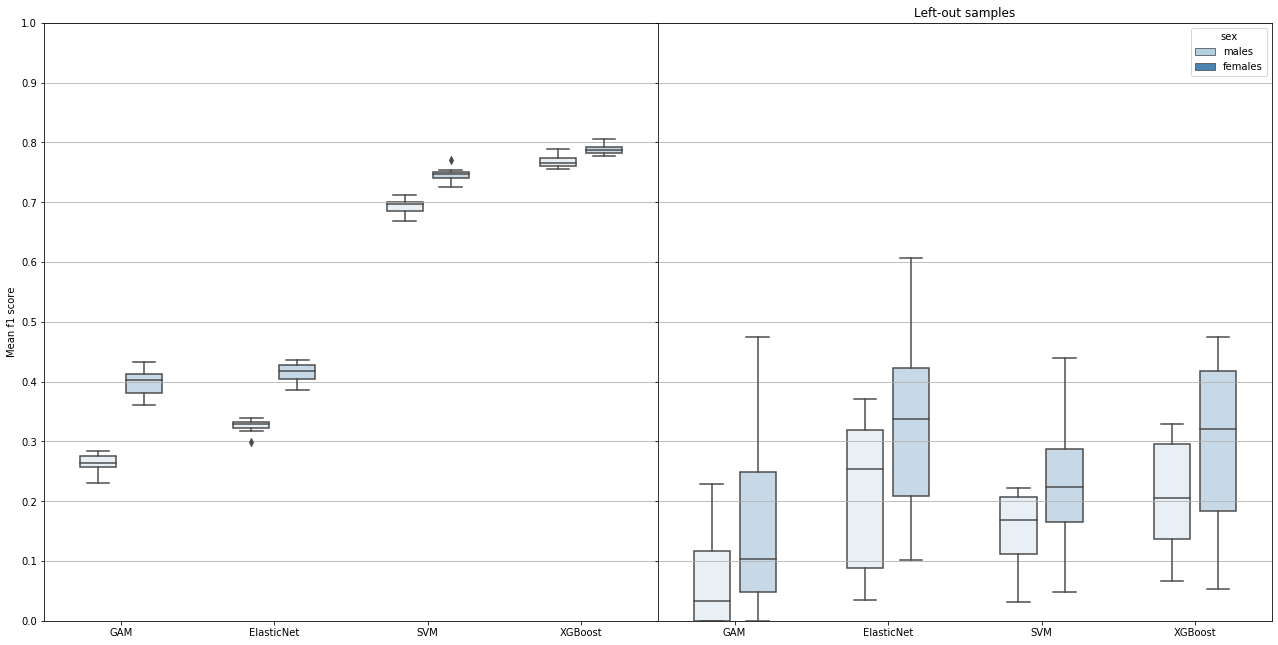

In [3]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import ExcelFile
import seaborn as sns
from matplotlib.patches import PathPatch
import matplotlib.ticker as plticker

# import excel file
df_test = pd.read_excel('Boxplot_test.xlsx')
df_country = pd.read_excel('Boxplot_country.xlsx')

def adjust_box_widths(g, fac):
    """
    Adjust the withs of a seaborn-generated boxplot.
    """

    # iterating through Axes instances
    for ax in g.axes:

        # iterating through axes artists:
        for c in ax.get_children():

            # searching for PathPatches
            if isinstance(c, PathPatch):
                # getting current width of box:
                p = c.get_path()
                verts = p.vertices
                verts_sub = verts[:-1]
                xmin = np.min(verts_sub[:, 0])
                xmax = np.max(verts_sub[:, 0])
                xmid = 0.5*(xmin+xmax)
                xhalf = 0.5*(xmax - xmin)

                # setting new width of box
                xmin_new = xmid-fac*xhalf
                xmax_new = xmid+fac*xhalf
                verts_sub[verts_sub[:, 0] == xmin, 0] = xmin_new
                verts_sub[verts_sub[:, 0] == xmax, 0] = xmax_new

                # setting new width of median line
                for l in ax.lines:
                    if np.all(l.get_xdata() == [xmin, xmax]):
                        l.set_xdata([xmin_new, xmax_new])


loc = plticker.MultipleLocator(base=0.1)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(22, 11))
plt.subplots_adjust(wspace=0)
sns.boxplot(x='algorithm', y='Mean f1 score', hue='sex', data=df_test, palette="Blues", width=0.6, ax = ax1)
sns.boxplot(x='algorithm', y='f1 score', hue='sex', data=df_country, palette="Blues", width=0.6, ax = ax2)
ax2.title.set_text('Left-out samples')
ax1.set(ylim=(0, 1))
ax1.yaxis.set_major_locator(loc)
ax1.set_xlabel('')
ax2.set(ylim=(0, 1))
ax2.set_xlabel('')
ax2.yaxis.set_major_locator(loc)
ax1.grid(b=True, which='major', axis='y')
ax2.grid(b=True, which='major', axis='y')
plt.setp(ax2.get_yticklabels(), visible=False)
ax2.set_ylabel('')
ax1.get_legend().remove()
#ax2.yaxis.set_visible(False)
sns.set_context("notebook", font_scale=2)

# Add transparency to colors
for patch in ax1.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .3))
    
for patch in ax2.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .3))

adjust_box_widths(fig, 0.8)
plt.savefig('Boxplot.png', bbox_inches='tight')